In [1]:
#importing required libraries
from collections import Counter
import random
import math
import matplotlib.pyplot as plt

In [2]:
def generate_population(size, bits, children = [], population = []) : # generate initial population with the given size
    for i in range(size) :
        for j in range(bits) : # Traverse through list of list
            children.append(0) # Set initial population as 0 because it can exceed threshold otherwise
        population.append(children)
        children=[] # Reset after each individual is created and added 
    return population

In [3]:
def calculate_fitness(population,size,bits,weights,values,fitness,knapsack_threshold,total_weight=0,total_value=0) : 
    for i in range(size):
        for j in range(bits):
            if(population[i][j] == 1) : # Traverse through population and find bits which have value as 1
                total_weight += weights[j] # Summation of weight of each individual in the population
                total_value += values[j] # Summation of value of each individual in the population
        if(total_weight <= knapsack_threshold): # First fitness criteria to check whether the total weight exceeds ,aximum carrying capacity of the van
            fitness[i] = total_value 
        total_weight = total_value = 0
    return 0 # Fitness passed as reference so no return necessary

In [4]:
def tsp_path(dist_data,n,t):     
    comb = []
    dist = []
    for i in range (0,t):
        tmp = random.sample(range(2, n+2), n)
        tmp.insert(0,1)
        if tmp not in comb:
            comb.append(tmp)
    for j in range (0,len(comb)):
        a = comb[j]
        val = 0.0
        for k in range (0,len(a)-1):
            val += dist_data[a[k]][a[k+1]]
        dist.append(val)
    idx = dist.index(min(dist))
    return dist[idx],comb[idx]

In [5]:
def distance_calculation(nodes):
    dist = []
    for i in range (0,len(nodes)):
        distances = []
        for j in range (0,len(nodes)):
            if i == j :
                distances.append(0.0)
            else :
                val = math.sqrt(math.pow(nodes[i][1] - nodes[j][1], 2) + math.pow(nodes[i][2] - nodes[j][2], 2))
                distances.append(val)
        dist.append(distances)
    return dist  

In [6]:
def tournament(fitness,size,tournament_size):
    random_parents = random.sample(range(size),tournament_size) # Get random indices within size of population
    max_temp = -1
    for i in random_parents :
        if(fitness[i]>max_temp):
            max_temp = fitness[i] # Assign max fitness
            parent_index = i # Assign index of parent with max fitness
    return parent_index

In [7]:
def crossover(child_a,child_b,bits):
    locus = random.randint(1,bits) # Generate random point for crossover
    temp_list = child_a[locus-1:] # Swap bits of children from locus to end 
    child_a[locus-1:] = child_b[locus-1:]
    child_b[locus-1:] = temp_list
    return child_a,child_b

In [8]:
def mutation(child_a,child_b,bits,count) :
    for i in range(count):
        locus = random.randint(1,bits)
        child_a[locus-1] = random.randint(0, 1) # Randomly choose 0 or 1
        #child_a[locus-1] = 1 - child_a[locus-1] # For direct swapping 1 and 0, this logic can be used instead as needed
    for i in range(count):
        locus = random.randint(1,bits)
        child_b[locus-1] = random.randint(0, 1)
        #child_b[locus-1] = 1 - child_b[locus-1] # Direct swapping 
    return child_a,child_b

In [9]:
def individual_fitness(binary_set,weight_list,profit_list,knapsack_threshold):
    total_weight, total_value = 0,0
    for index,item in enumerate(binary_set):
        if(item == 1):
            total_weight += weight_list[index]
            total_value += profit_list[index]
    if(total_weight <= knapsack_threshold):
        return total_value
    else: 
        return 0

In [10]:
def replacement(child_1, child_2,fitness,initial_population,knapsack_threshold,weight_list,profit_list):
    child_1_fitness = individual_fitness(child_1,weight_list,profit_list,knapsack_threshold)
    child_2_fitness = individual_fitness(child_2,weight_list,profit_list,knapsack_threshold)
    if(child_1_fitness > min(fitness)):
        fitness[fitness.index(min(fitness))] = child_1_fitness
        initial_population[fitness.index(min(fitness))] = child_1
    if(child_2_fitness > min(fitness)):
        fitness[fitness.index(min(fitness))] = child_2_fitness
        initial_population[fitness.index(min(fitness))] = child_2
    return fitness

In [11]:
def order_of_cities(tsp_best_path,dist_data):
    distance_list = []
    for i,j in zip(range(0,len(tsp_best_path)-1),range(1,len(tsp_best_path))) :
        distance_list.append(dist_data[ tsp_best_path[i] ][ tsp_best_path[j] ])
    distance_list.append(dist_data[ 1 ][ tsp_best_path[len(tsp_best_path)-1] ])    
    return distance_list

In [12]:
def reshape(list1, list2):
    last = 0
    res = []
    for ele in list1:
        res.append(list2[last : last + len(ele)])
        last += len(ele)       
    return res

In [13]:
def list_manipulation(initial_population,fitness,bags_in_cities,weight_list,profit_list):
    best_child = initial_population[fitness.index(max(fitness))]
    temp_list = []
    temp_list_list = []
    weighted = []
    profits = []
    start = 0
    for i in bags_in_cities:
        for j in range(i):
            temp_list.append(0)
        temp_list_list.append(temp_list)
        temp_list = []
    for index,item in enumerate(best_child):
        if(item == 1):
            weighted.append(item*weight_list[index])
            profits.append(item*profit_list[index])
        else: 
            weighted.append(0)
            profits.append(0)
    return reshape(temp_list_list,best_child),reshape(temp_list_list,weighted),reshape(temp_list_list,profits)

In [14]:
def weight_order_calculation(comb,new_weight_list):
    tmp = []
    for i in comb:
        tmp.append(new_weight_list[comb.index(i)])
    return tmp     

In [15]:
def profit_order_calculation(comb,new_profit_list):
    tmp = []
    total_profit = 0
    for i in comb:
        tmp.append(new_profit_list[comb.index(i)])
    for i in tmp:
        total_profit += sum(i)
    return total_profit   

In [16]:
def time_calculation(max_speed,min_speed,weight_order,knapsack_threshold, individual_distances):
    time = 0
    maxSpeed = max_speed
    for index,item in enumerate(weight_order):
        node_weight = sum(weight_order[index])
        temp_velocity = 1 - ((max_speed*(node_weight/knapsack_threshold))* min_speed)
        time += (individual_distances[index] /maxSpeed )
    return time

In [17]:
a = [*range(0,20,1)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
def main():
    content_list = []
    textfile = open("dataset/whole_data_set.txt") # getting data from the file
    for i in textfile :
        content_list.append(i.split())

    number_of_cities = int(content_list[0][3]) + 1 # total number of cities
    knapsack_threshold = int(content_list[1][3])  # threshold value
    min_speed = float(content_list[2][2])        # minimum speed
    max_speed = float(content_list[3][2])       # maximum speed
    del content_list[0:7]                     
    node_list = []                            
    for i in range(number_of_cities):
        node_list.append([eval(j) for j in content_list[i]])  # list of node's coordinates
    del content_list[0:number_of_cities+1]

    profit_list = []
    weight_list = []
    city = []

    for i in content_list:
        profit_list.append(int(i[1]))         #profits of each bags in the nodes 
        weight_list.append(int(i[2]))         # weights of individual bags
        city.append(int(i[3]))                # nodes details
    
    tsp_population = int(input("Enter the number of trials for TSP to check - ")) #dynamic population as per user for tsp
    population_size = int(input("Enter number of population for weight from cities- ")) # population size for knapsack part
    tournament_size = int(input("Enter tournament size - ")) # tournament size 
    cross = input("\n Do you want to perform crossover? Y or N ")
    mutations = int(input("Enter the mutation rate - "))   # mutation size
    trials = int(input("Enter the trials you want to run"))
    iterations = int(input("Enter the number of iterations required")) # number of iterations required for comparison
    
    dist_data = distance_calculation(node_list)  #distance between all nodes
    # sorting weights and profits in order of cities
    city, weight_list, profit_list = (list(t) for t in zip(*sorted(zip(city, weight_list, profit_list)))) 
    bags_in_cities = list(dict(Counter(city)).values()) # listing of number of bags per city
    total_bags = sum(bags_in_cities) # total bags value
    
    best_dist = []               # array of best distances of all trials
    best_comb = []               # array of best cities combinations of all trials of tsp
    profit_fit = []             # array of profits
    best_fit = []              # best fitness array from all trials
    best_time = []              # total time taken array for all trials
    for k in range (trials):
        random.seed(k)
        dist, comb = tsp_path(dist_data,number_of_cities - 2,tsp_population)   # distance matrix and path of tsp output 
        best_dist.append(dist) 
        best_comb.append(comb)
        fitness=[]
        initial_population = []
        initial_population = generate_population(population_size,total_bags) # initial population generation
        for j in range(population_size):
            fitness.append(0)                                    # fitness generation for the population
        calculate_fitness(initial_population,population_size,total_bags,weight_list,profit_list,fitness,knapsack_threshold) # calculating fitness
        for i in range(iterations): 
            winner_a = tournament(fitness,population_size,tournament_size) # 1st winner after tournament
            winner_b = tournament(fitness,population_size,tournament_size)  # 2nd wuinner after tournament
            if cross == 'y' or cross == 'Y' or cross == 'yes' or cross == 'Yes' or cross == 'YES':
                child_a,child_b = crossover(initial_population[winner_a].copy(),initial_population[winner_b].copy(),total_bags) # Obtain children from crossover, lists copied over so origial
            else:
                child_a = initial_population[winner_a].copy()                       # continuing with new generation without crossover 
                child_b = initial_population[winner_b].copy()                       
            mutated_a,mutated_b = mutation(child_a,child_b,total_bags,mutations) #  mutated children
            replacement(mutated_a,mutated_b,fitness,initial_population,knapsack_threshold,weight_list,profit_list) # replacement of new children with worst population
            best_fit.append(max(fitness))
        itr = [*range(0,iterations,1)]
        #plt.plot(itr, best_fit, label = 'TRIAL'+ str(k)+' | Maximum Fitness:' +str(max(best_fit)))
        #plt.scatter(iterations,max(best_fit))
        #plt.title('Population '+str(population_size) +'|Mutation rate '+str(mutations))
        #plt.xlabel('Iterations')
        #plt.ylabel('Fitness')
        #plt.legend()
        
        #for pareto
        
        
        best_fit.clear()
        itr.clear()
        individual_distances = order_of_cities(comb,dist_data) 
        knapsack_list,new_weight_list,new_profit_list = list_manipulation(initial_population,fitness,bags_in_cities,weight_list,profit_list)
        weight_order = weight_order_calculation(comb,new_weight_list)
        total_profit = profit_order_calculation(comb,new_profit_list) # total profit calculation
        profit_fit.append(total_profit)
        total_time = time_calculation(max_speed,min_speed,weight_order,knapsack_threshold, individual_distances)
        best_time.append(total_time)
        fitness.clear()
        initial_population.clear()
    #plt.show()
    plt.scatter(profit_fit, best_time,label = 'TRIAL'+ str(k+1), color = 'slateblue')
    plt.title('ITERATIONS '+str(trials) +'|TSP POPULATION '+str(tsp_population))
    plt.xlabel('PROFIT')
    plt.ylabel('TIME')
    #plt.legend()
    plt.show()
    plt.scatter(best_time,best_dist, label = 'TRIAL'+ str(k+1), color = 'crimson')
    plt.title('ITERATIONS '+str(trials) +'|TSP POPULATION '+str(tsp_population))
    plt.xlabel('TIME')
    plt.ylabel('DISTANCE')
    #plt.legend()
    plt.show()
    print('distances ', best_dist)
    #print('combinations ', best_comb)
    print('profits ', profit_fit)
    print('fitness ', best_fit)
    print('time ', best_time)


Enter the number of trials for TSP to check - 1000
Enter number of population for weight from cities- 20
Enter tournament size - 2

 Do you want to perform crossover? Y or N y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required100


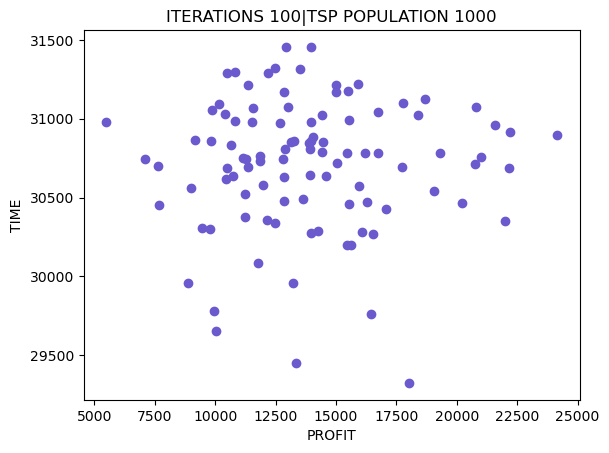

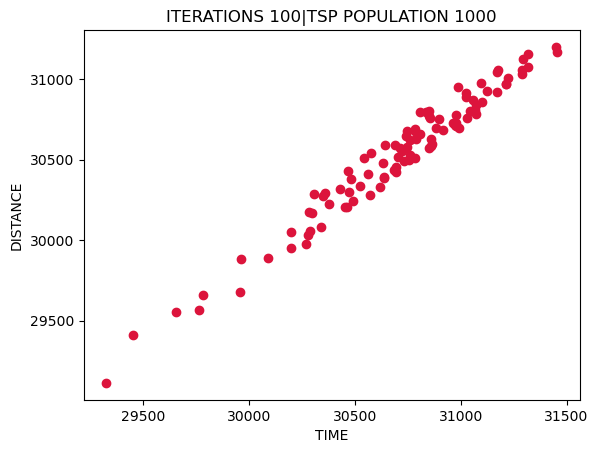

distances  [30696.81308404077, 29551.59686155407, 30432.183921314063, 30571.332953795638, 30048.56998927052, 30286.870755939985, 30512.889863239554, 30203.598870730882, 30166.993751333343, 30930.16218721603, 30423.42665330556, 30685.868808470383, 30621.37327989231, 30678.71535065694, 30729.242673730016, 30681.685220293806, 30757.148250642455, 30273.812356895647, 30452.89849260161, 29658.020445029735, 31010.6643796887, 30381.415520110208, 30800.734152303186, 30891.842333325567, 29883.42130402294, 30320.223797492774, 30583.738587118056, 30175.836078962766, 31057.19171590915, 30871.71263993432, 30280.92942520512, 30769.380649181905, 30709.06587654586, 30491.33251466629, 31156.34550221688, 30839.423613197778, 30968.76426916328, 30921.76824383473, 30809.885471397676, 30083.344085169978, 30688.899664774195, 30859.053380909936, 30730.66959448142, 30205.91667153234, 30796.330742497114, 30598.133011542606, 30512.524661033058, 30977.7684295048, 29949.99240246508, 31168.72210684419, 31042.6536496

In [23]:
print(main())

Enter the number of trials for TSP to check - 1000
Enter number of population for weight from cities- 20
Enter tournament size - 2

 Do you want to perform crossover? Y or N Y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required1000


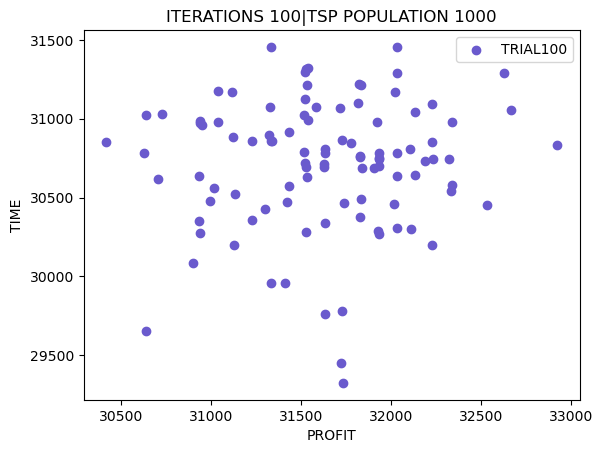

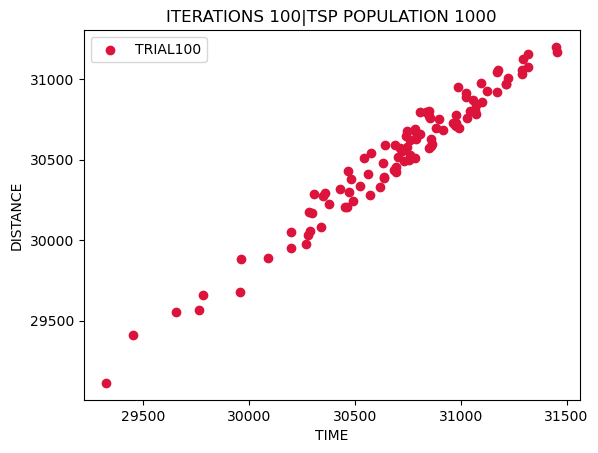

distances  [30696.81308404077, 29551.59686155407, 30432.183921314063, 30571.332953795638, 30048.56998927052, 30286.870755939985, 30512.889863239554, 30203.598870730882, 30166.993751333343, 30930.16218721603, 30423.42665330556, 30685.868808470383, 30621.37327989231, 30678.71535065694, 30729.242673730016, 30681.685220293806, 30757.148250642455, 30273.812356895647, 30452.89849260161, 29658.020445029735, 31010.6643796887, 30381.415520110208, 30800.734152303186, 30891.842333325567, 29883.42130402294, 30320.223797492774, 30583.738587118056, 30175.836078962766, 31057.19171590915, 30871.71263993432, 30280.92942520512, 30769.380649181905, 30709.06587654586, 30491.33251466629, 31156.34550221688, 30839.423613197778, 30968.76426916328, 30921.76824383473, 30809.885471397676, 30083.344085169978, 30688.899664774195, 30859.053380909936, 30730.66959448142, 30205.91667153234, 30796.330742497114, 30598.133011542606, 30512.524661033058, 30977.7684295048, 29949.99240246508, 31168.72210684419, 31042.6536496

In [124]:
print(main())  # trial 1

Enter the number of trials for TSP to check - 10000
Enter number of population for weight from cities- 20
Enter tournament size - 2

 Do you want to perform crossover? Y or N y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required1000


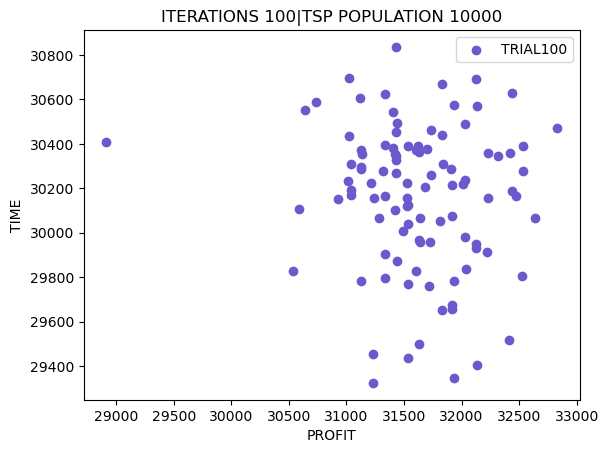

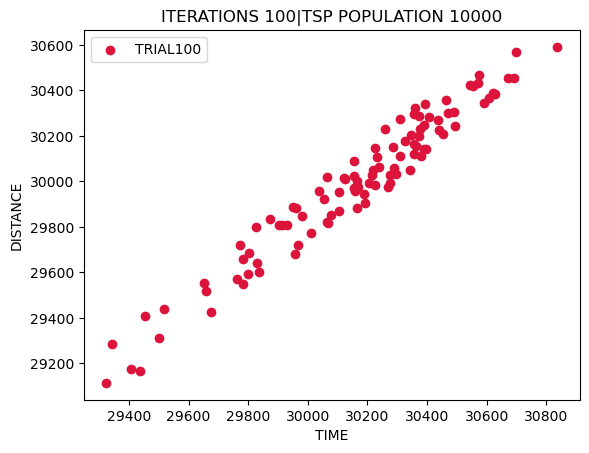

distances  [29920.83405586719, 29551.59686155407, 30143.052557226736, 29870.24007485626, 29820.612668563357, 29816.73160529294, 29719.663525655946, 30177.98789968453, 30013.410862096138, 30421.6651551714, 29977.120339661844, 29992.214829712677, 29686.114218046532, 29600.118163628365, 29437.367683287466, 30283.394218815985, 30111.82127147268, 29590.59941510149, 30452.89849260161, 29658.020445029735, 30064.69626227187, 30366.59789583719, 30269.283033353953, 30468.321525237254, 29883.42130402294, 29548.817736665533, 30029.613649021492, 29809.723604776187, 29807.91951419585, 30248.590014722096, 29173.328623666817, 29993.894952954583, 29887.52211783972, 30201.837815362036, 30420.776249763025, 30112.817208526878, 29999.99203630032, 29850.940620959933, 30119.20391130682, 29905.882351400734, 30567.41477495176, 30306.25462285031, 30590.713748192433, 30205.91667153234, 29880.635298258214, 30338.806306174618, 30009.995717045265, 30140.095801391897, 29425.039800620383, 29771.12224342001, 29956.293

In [125]:
print(main()) # 2nd trial

In [126]:
print(main()) # 3rd

Enter the number of trials for TSP to check - 1000
Enter number of population for weight from cities- 20
Enter tournament size - 2

 Do you want to perform crossover? Y or N y
Enter the mutation rate - 1
Enter the trials you want to run100
Enter the number of iterations required10000


KeyboardInterrupt: 

In [119]:
time =[30053.80021697595, 29651.916351185944, 30391.052557226736, 30105.663098369256, 30064.98124264767, 30067.80928251654, 29968.17911872809, 30325.17485562832, 30121.114158238826, 30543.583160404425, 30169.203654918532, 30276.29932418571, 29803.82572980303, 29837.031649947738, 29516.765416252583, 30406.94178050783, 30308.18827481082, 29798.137363438655, 30691.56143484443, 29782.084944383903, 30238.69626227187, 30607.26363914105, 30437.330645654754, 30574.000283746238, 29959.526494384703, 29782.055812459344, 30215.172265097382, 29902.76123157309, 29914.202156240543, 30389.501334352564, 29405.879693326795, 30203.7711069121, 29948.710352002832, 30345.05792568178, 30553.9828562058, 30381.02608235472, 30164.770675692685, 30076.683837912293, 30354.626934819815, 30191.42744416193, 30697.70675475098, 30490.25462285031, 30836.11953459528, 30453.91667153234, 30164.719792731248, 30392.172962431123, 30123.837712811328, 30396.595314062, 29674.198384658743, 30009.78518566283, 30157.539543024388, 30571.610206749443, 30373.203002754042, 30295.32106798777, 30276.252587802883, 29323.71533702217, 30359.00540527161, 29931.47491998444, 29980.083130391457, 30153.727346969044, 30217.816461337945, 30470.634787399205, 30492.817686996, 30224.621678158943, 30462.955983603984, 29452.2820649717, 29958.36668966827, 30104.2985684024, 29500.628377238965, 30225.1861229512, 30309.41029044014, 30188.86521863261, 30362.764925425745, 30357.640938419354, 30354.854510144436, 30343.023577566524, 30230.808705189622, 30627.718339956955, 29657.520167538005, 30155.002660179125, 29872.050763568794, 30590.14815315429, 29827.52826159959, 30441.512398799547, 30671.45407962168, 30038.690431724655, 30288.72798570816, 30285.55803521428, 29761.489820693303, 29436.51820801149, 30376.150481493503, 30268.55080607105, 30371.25554147669, 29770.90146741435, 30622.665901430755, 29344.335073526247, 30257.954934305562, 29828.406617325916, 30065.80825900901, 30155.990706550067]
a = sorted(time)
a[:5]

[29323.71533702217,
 29344.335073526247,
 29405.879693326795,
 29436.51820801149,
 29452.2820649717]

In [116]:
distances =[29920.83405586719, 29551.59686155407, 30143.052557226736, 29870.24007485626, 29820.612668563357, 29816.73160529294, 29719.663525655946, 30177.98789968453, 30013.410862096138, 30421.6651551714, 29977.120339661844, 29992.214829712677, 29686.114218046532, 29600.118163628365, 29437.367683287466, 30283.394218815985, 30111.82127147268, 29590.59941510149, 30452.89849260161, 29658.020445029735, 30064.69626227187, 30366.59789583719, 30269.283033353953, 30468.321525237254, 29883.42130402294, 29548.817736665533, 30029.613649021492, 29809.723604776187, 29807.91951419585, 30248.590014722096, 29173.328623666817, 29993.894952954583, 29887.52211783972, 30201.837815362036, 30420.776249763025, 30112.817208526878, 29999.99203630032, 29850.940620959933, 30119.20391130682, 29905.882351400734, 30567.41477495176, 30306.25462285031, 30590.713748192433, 30205.91667153234, 29880.635298258214, 30338.806306174618, 30009.995717045265, 30140.095801391897, 29425.039800620383, 29771.12224342001, 29956.293425049407, 30432.930720162567, 30200.46041970053, 30033.840667192606, 30029.805838990895, 29113.839183064654, 30322.783864719062, 29809.556914751414, 29846.876523948682, 29969.727346969044, 30049.00887856987, 30301.827204631132, 30243.65910295764, 30145.72934646568, 30356.673341559293, 29409.76148172076, 29678.9387025231, 29951.563503666104, 29312.330740503927, 29984.52037964734, 30273.18874988759, 29944.496644548297, 30155.22697708858, 30296.45270425624, 30162.521465661695, 30049.520596321017, 30105.78070832492, 30385.850607507997, 29519.59265034147, 30022.036499070367, 29835.829223016244, 30343.7014043423, 29797.065169176134, 30226.105806514166, 30456.0474873363, 29959.29269875954, 30058.910666952586, 30148.736984202384, 29569.406505436615, 29168.309334183647, 30228.09643730693, 29975.047824825542, 30285.371899262354, 29718.74784817273, 30389.427825636943, 29285.275781285312, 30229.6706630581, 29640.108980590878, 30020.201242005045, 30087.87316108636]

In [117]:
a,b = (list(t) for t in zip(*sorted(zip(time,distances))))

In [118]:
b[:5]

[29113.839183064654,
 29285.275781285312,
 29173.328623666817,
 29168.309334183647,
 29409.76148172076]